In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.signal import find_peaks


In [2]:
wavelength = 1064e-9 # m
c = 3e8 # m/s
L1_0 = 1 # m, to be varied
delta_L1 = 50e-9 # m, the variation
L1 = L1_0 + delta_L1 # m, total length
L2 = 1 # fixed
k = 2 * np.pi / wavelength

# mirror specs
t1, t2, t3 = np.sqrt(0.1), np.sqrt(0.1), np.sqrt(0.1)
r1, r2, r3 = np.sqrt(1 - t1**2), np.sqrt(1 - t2**2), np.sqrt(1 - t3**2)

# frequency range
delta_nu = np.linspace(-40e6, 40e6, 500)
omega = 2 * np.pi * delta_nu



# exps
exp_L1 = np.exp(2j *( omega / c)* L1 )
exp_L2 = np.exp(2j * (omega/c) * L2 )
exp_total_1 = np.exp(1j * (omega/c) * (L1 + L2) )
exp_total_2 = np.exp(2j * (omega/c) * (L1 + L2) )


# the formula
nominator = - t1 * t2 * t3 * exp_total_1
denominator = exp_total_2 - r1 * r2 * exp_L2 - r2 * r3 * exp_L1 + r1 * r3 * (r2 **2 + t2 **2)
transmission_total = abs(nominator/denominator) ** 2

# find peaks
# peaks, _ = find_peaks(transmission_total, height=0.1)

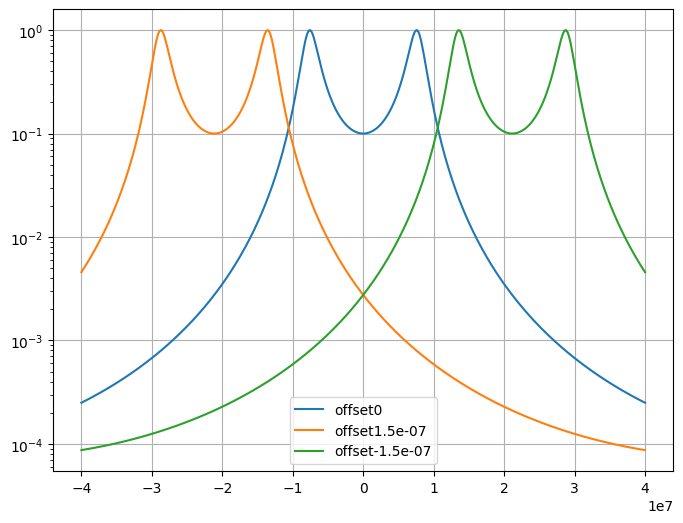

In [3]:
delta_L1_arr = [0, 150e-9, -150e-9]
plt.figure(figsize=(8, 6))
plt.yscale("log")
plt.grid()


# 2 L/ lambda


for delta in delta_L1_arr:

    order = 2 * (L1_0+L2 + delta) / wavelength
    omega = 2 * np.pi * delta_nu

    omega_0 = c * 2 * np.pi / (2 * (L1_0 + L2 + delta))

    omega = omega +  order * omega_0 * delta / (2 * L1)
    exp_L1 = np.exp(2j * omega * (L1_0 + delta) /c)
    exp_L2 = np.exp(2j * omega * L2/c)
    exp_total_1 = np.exp(1j * omega * (L1_0 + L2 + delta)/c)
    exp_total_2 = np.exp(2j * omega * (L1 + L2 + delta)/c)


    # the formula
    nominator = - t1 * t2 * t3 * exp_total_1
    denominator = exp_total_2 - r1 * r2 * exp_L2 - r2 * r3 * exp_L1 + r1 * r3 * (r2 **2 + t2 **2)
    transmission_total = abs(nominator/denominator) ** 2
    plt.plot(delta_nu, transmission_total, label = "offset" + str(delta))

# plt.xlim((min(delta_nu), max(delta_nu)))
plt.legend()

# basically the shift is tiny for 50 e-9 i have no clue how they get a big one in the paper honestly
    